### Athens University of Economics and Business
### Department of Management Science & Technology
### Msc in Business Analytics

### Course : Machine Learning & Content Analytics
* Instructors : H.Papageorgiou, G.Perakis
* Students : Xheni Cobanaj (f2822117), Nikolaos Matzakos (f2822107), Dimitris Papageorgiou (f2822109)

* Import of necessary libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Data Preprocessing.

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\petro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\petro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\petro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\petro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("mbti_1.csv",header=0)
print("Columns present in the data: ",[i for i in df.columns])
print("Number of data points: ",df.shape[0])
df.head()

Columns present in the data:  ['type', 'posts']
Number of data points:  8675


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
data = df.copy()

* Cleaning function to be applied to the posts.

In [ ]:
def text_cleaning(text):
  
  # make all characters lowercase
  text = text.lower()

  # removing the posts delimiter with double space to separate words  
  text = text.replace("|"," ") 

  # removing the urls
  text = re.sub(r'https?:\/\/.*?[\s+]', '',text)

  # removing Punctuation
  text = re.sub('[%s]*' % string.punctuation, '',text)

  # removing numbers
  text = re.sub('[0-9]+','', text)
   
  # removing non-words 
  text = re.sub(r'[^a-zA-Z\s]','',text)

  # removing the personallity type codes 
  pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
  pers_types = [p.lower() for p in pers_types]
  
  for t in pers_types:
      text = text.replace(t,"")


  # removing big spaces
  text = re.sub(' +', ' ', text) 

  

  return(text)  

In [ ]:
data['posts'] = data['posts'].apply(text_cleaning)

* Function for making the four target features.

In [ ]:
# function for producing the four binary target variables
def categories(df):
  df['Extraversion'] = ''
  df['Sensing'] = ''
  df['Thinking'] = ''
  df['Judging'] = ''

  for i in df.index:    
    if "E" in df['type'][i]:
      df['Extraversion'][i] = 1
    else:
      df['Extraversion'][i] = 0

    if "S" in df['type'][i]:
      df['Sensing'][i] = 1
    else:
      df['Sensing'][i] = 0
    
    if "T" in df['type'][i]:
      df['Thinking'][i] = 1
    else:
      df['Thinking'][i] = 0
    
    if "J" in df['type'][i]:
      df['Judging'][i] = 1
    else:
      df['Judging'][i] = 0
  return(df)

* Converting the task from multiclass to multilabel

In [ ]:
categories(data)

,type,posts,Extraversion,Sensing,Thinking,Judging
0,INFJ,and moments sportscenter not top ten plays pr...,0,0,0,1
1,ENTP,im finding the lack of me in these posts very ...,1,0,1,0
2,INTP,good one of course to which i say i know thats...,0,0,1,0
3,INTJ,dear i enjoyed our conversation the other day ...,0,0,1,1
4,ENTJ,youre fired thats another silly misconception ...,1,0,1,1
...,...,...,...,...,...,...
8670,ISFP,ixfp just because i always think of cats as f...,0,1,0,0
8671,ENFP,soif this thread already exists someplace else...,1,0,0,0
8672,INTP,so many questions when i do these things i wou...,0,0,1,0
8673,INFP,i am very conflicted right now when it comes t...,0,0,0,0


### Making our custom stop words vocabulary 

In [ ]:
corpora = " ".join(data.posts)
print(corpora[:1000])

 and moments sportscenter not top ten plays pranks what has been the most lifechanging experience in your life on repeat for most of today may the perc experience immerse you the last thing my friend posted on his facebook before committing suicide the next day rest in peace hello sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as welcome and stuff game set match prozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items youve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by all things in moderation sims is indeed a video game and a good one at that note a good one at that is somewhat subjective

In [ ]:
top_words = Counter(corpora.split()).most_common()

In [ ]:
stop_words = set([i[0].lower() for i in top_words[:100]])

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_cus = stop_words.union(set(stopwords.words('english')))
stop_cus = stop_cus = list(stop_cus)

* Function for removing stop words and stemming the cleaned text.

In [ ]:
def stopwords_stemming(x):
  ps = PorterStemmer()
  x = word_tokenize(x)
  x = [word for word in x if word not in stop_cus]
  x= [ps.stem(w) for w in x]
  x = ' '.join(x)
  return(x)

In [ ]:
data['posts'] = data['posts'].apply(stopwords_stemming)

# Data Split 

In [ ]:
X = data['posts']
y = data[['Extraversion','Sensing','Thinking','Judging']]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.1,
                                                            random_state=20,
                                                            stratify=y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10, 
                                                  random_state=20,
                                                  stratify=y_train_val)

In [ ]:
print(f'train: {len(X_train)}\n'
      f'val: {len(X_val)}\n'
      f'test: {len(X_test)}')

train: 7026
val: 781
test: 868


## Encoding Target Variable

In [ ]:
y_train_enc = np.array(y_train).astype('float32')
y_train_enc

array([[0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.]], dtype=float32)

In [ ]:
y_val_enc = np.array(y_val).astype('float32')
y_test_enc = np.array(y_test).astype('float32')

# Feature Extraction (TF-IDF).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
max_words = 30000

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words= None,
    ngram_range=(1, 1), # unigrams
    max_features= max_words,
    binary=False # binary output or full counts. 
)
tf_idf_vectorizer

TfidfVectorizer(max_features=30000, strip_accents='unicode')

In [ ]:
X_train_enc = tf_idf_vectorizer.fit_transform(X_train)

In [ ]:
X_val_enc = tf_idf_vectorizer.transform(X_val)
X_test_enc = tf_idf_vectorizer.transform(X_test)

In [ ]:
print(f'X_train encoded shape: {X_train_enc.shape}')
print(f'X_val encoded shape: {X_val_enc.shape}')
print(f'X_test encoded shape: {X_test_enc.shape}')

X_train encoded shape: (7026, 30000)
X_val encoded shape: (781, 30000)
X_test encoded shape: (868, 30000)


# Logistic Regression.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from datetime import datetime

## Simpe fit using OneVSRestClassifier technique.

In [ ]:
start = datetime.now()

classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', class_weight='balanced',solver='liblinear'), n_jobs=-1)
classifier.fit(X_train_enc, y_train_enc)
predictions = classifier.predict(X_val_enc)

print("Accuracy :",metrics.accuracy_score(y_val_enc, predictions))
print("Hamming loss ",metrics.hamming_loss(y_val_enc,predictions))

#micro scores
precision = precision_score(y_val_enc, predictions, average='micro')
recall = recall_score(y_val_enc, predictions, average='micro')
f1 = f1_score(y_val_enc, predictions, average='micro')
print("\nMicro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

#macro scores
precision = precision_score(y_val_enc, predictions, average='macro')
recall = recall_score(y_val_enc, predictions, average='macro')
f1 = f1_score(y_val_enc, predictions, average='macro')
print("\nMacro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print("\nClassification Report")

#classification report
print (metrics.classification_report(y_val_enc, predictions))

print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.2893725992317542
Hamming loss  0.2765685019206146

Micro-average quality numbers
Precision: 0.5377, Recall: 0.6994, F1-measure: 0.6080

Macro-average quality numbers
Precision: 0.4995, Recall: 0.6628, F1-measure: 0.5622

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.62      0.49       181
           1       0.28      0.56      0.37       108
           2       0.77      0.84      0.80       359
           3       0.55      0.64      0.59       310

   micro avg       0.54      0.70      0.61       958
   macro avg       0.50      0.66      0.56       958
weighted avg       0.57      0.70      0.63       958
 samples avg       0.46      0.55      0.48       958

Time taken to run this cell : 0:00:02.803720


C:\Users\petro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hypeparameter Tuning



* Grid Search Process

In [ ]:
def random_search_logistic(x_train,y_train,x_val,y_val):
    
    acc_best=0
    alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
    penalty=['l1','l2']
    
    for i in alpha :
        for j in penalty:
            
            
            model=OneVsRestClassifier(LogisticRegression(class_weight='balanced',solver='liblinear',C=i,penalty=j), n_jobs=-1)
           
            model.fit(x_train,y_train)
            
            y_pred=model.predict(x_val)
            
            acc=metrics.accuracy_score(y_val, y_pred)
            
            hl=metrics.hamming_loss(y_val,y_pred)
            
            
            print("Accuracy : {}, Hamming Loss : {}, with : [ Alpha : {}, Penalty : {} ], ".format(acc,hl,i,j))
            
 
    
    
        if acc > acc_best:
            acc_best=acc
            fits={"alpha" : i, "penalty" : j,"accuracy" : acc_best, "hamming_loss" : hl, "hamming_score" : 1-hl}

            ,
            
    return fits
            

In [ ]:
random_search_logistic(X_train_enc,y_train_enc,X_val_enc,y_val_enc)

Accuracy : 0.2112676056338028, Hamming Loss : 0.3066581306017926, with : [ Alpha : 1e-06, Penalty : l1 ], 
Accuracy : 0.176696542893726, Hamming Loss : 0.34827144686299616, with : [ Alpha : 1e-06, Penalty : l2 ], 
Accuracy : 0.2112676056338028, Hamming Loss : 0.3066581306017926, with : [ Alpha : 1e-05, Penalty : l1 ], 
Accuracy : 0.1792573623559539, Hamming Loss : 0.3479513444302177, with : [ Alpha : 1e-05, Penalty : l2 ], 
Accuracy : 0.2112676056338028, Hamming Loss : 0.3066581306017926, with : [ Alpha : 0.0001, Penalty : l1 ], 
Accuracy : 0.19590268886043533, Hamming Loss : 0.33962868117797695, with : [ Alpha : 0.0001, Penalty : l2 ], 
Accuracy : 0.2112676056338028, Hamming Loss : 0.3066581306017926, with : [ Alpha : 0.001, Penalty : l1 ], 
Accuracy : 0.2560819462227913, Hamming Loss : 0.3005761843790013, with : [ Alpha : 0.001, Penalty : l2 ], 
Accuracy : 0.2112676056338028, Hamming Loss : 0.3066581306017926, with : [ Alpha : 0.01, Penalty : l1 ], 
Accuracy : 0.28425096030729835, Ha

{'alpha': 10,
 'penalty': 'l2',
 'accuracy': 0.3892445582586428,
 'hamming_loss': 0.22439180537772088,
 'hamming_score': 0.7756081946222791}

In [ ]:
st=datetime.now()

classifier2 = OneVsRestClassifier(LogisticRegression(class_weight='balanced',solver='liblinear',C=10,penalty='l2'), n_jobs=-1)
classifier2.fit(X_train_enc, y_train_enc)
predictions = classifier2.predict(X_val_enc)


print("Time taken to run this cell: ",datetime.now()-st)

Time taken to run this cell:  0:00:01.465184


* Evaluation metrics

In [ ]:
start = datetime.now()

print("Accuracy :",metrics.accuracy_score(y_val_enc, predictions))
print("Hamming loss ",metrics.hamming_loss(y_val_enc,predictions))

precision = precision_score(y_val_enc, predictions, average='micro')
recall = recall_score(y_val_enc, predictions, average='micro')
f1 = f1_score(y_val_enc, predictions, average='micro')
 
print("\nMicro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_val_enc, predictions, average='macro')
recall = recall_score(y_val_enc, predictions, average='macro')
f1 = f1_score(y_val_enc, predictions, average='macro')
 
print("\nMacro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print("\nClassification Report")
print (metrics.classification_report(y_val_enc, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.3892445582586428
Hamming loss  0.22439180537772088

Micro-average quality numbers
Precision: 0.6377, Recall: 0.6211, F1-measure: 0.6293

Macro-average quality numbers
Precision: 0.5815, Recall: 0.5607, F1-measure: 0.5704

Classification Report
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       181
           1       0.45      0.38      0.41       108
           2       0.81      0.80      0.80       359
           3       0.59      0.58      0.58       310

   micro avg       0.64      0.62      0.63       958
   macro avg       0.58      0.56      0.57       958
weighted avg       0.63      0.62      0.63       958
 samples avg       0.49      0.50      0.47       958

Time taken to run this cell : 0:00:00.029079


C:\Users\petro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\petro\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* ROC Curve

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_enc = label_binarize(y_train_enc, classes=[0, 1, 2,3])
n_classes = y_enc.shape[1]

# Learn to predict each class against the other
y_score = classifier.fit(X_train_enc, y_train_enc).decision_function(X_val_enc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_enc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_enc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

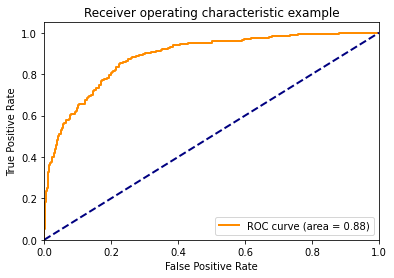

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


# Xgboost 

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

## Hyperparameter Tuning.

* Grid Search Process :

In [ ]:
def random_search_xgboost(x_train,y_train,x_val,y_val):
    
    acc_best=0
    max_depth=[3,6,8]
    learning_rate=[0.1, 0.2, 0.3]
    n_estimators=[100, 250,300]
    
    for i in max_depth :
        for j in learning_rate:
            
            for k in n_estimators:
                
                xgbclf=xgb.XGBClassifier(objective='binary:logistic',eval_metric='logloss',max_depth=i,learning_rate=j,n_estimators=k)


                # create MultiOutputClassifier instance with XGBoost model inside
                multilabel_model = MultiOutputClassifier(xgbclf)

                # fit the model
                multilabel_model.fit(x_train, y_train)

            
                y_pred=multilabel_model.predict(x_val)
            
                acc=metrics.accuracy_score(y_val, y_pred)
            
                hl=metrics.hamming_loss(y_val,y_pred)
            
            
                print("Accuracy : {}, Hamming Loss : {}, with : [ Max_Depth : {}, Learning_Rate : {}, N_Estimator : {}  ], ".format(acc,hl,i,j,k))
            
 
    
    
        if acc > acc_best:
            acc_best=acc
            comb={"Max_Depth" : i, "Learning_Rate" : j, "N_Estimator" : k,"Accuracy" : acc_best, "Hamming_Loss" : hl, "Hamming_Score" : 1-hl}


            
    return comb

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
random_search_xgboost(X_train_enc,y_train_enc,X_val_enc,y_val_enc)

Accuracy : 0.3405889884763124, Hamming Loss : 0.23431498079385404, with : [ Max_Depth : 3, Learning_Rate : 0.1, N_Estimator : 100  ], 
Accuracy : 0.36619718309859156, Hamming Loss : 0.22503201024327785, with : [ Max_Depth : 3, Learning_Rate : 0.1, N_Estimator : 250  ], 
Accuracy : 0.3674775928297055, Hamming Loss : 0.22311139564660692, with : [ Max_Depth : 3, Learning_Rate : 0.1, N_Estimator : 300  ], 
Accuracy : 0.353393085787452, Hamming Loss : 0.23111395646606914, with : [ Max_Depth : 3, Learning_Rate : 0.2, N_Estimator : 100  ], 
Accuracy : 0.3444302176696543, Hamming Loss : 0.2327144686299616, with : [ Max_Depth : 3, Learning_Rate : 0.2, N_Estimator : 250  ], 
Accuracy : 0.3495518565941101, Hamming Loss : 0.2320742637644046, with : [ Max_Depth : 3, Learning_Rate : 0.2, N_Estimator : 300  ], 
Accuracy : 0.3380281690140845, Hamming Loss : 0.23655569782330346, with : [ Max_Depth : 3, Learning_Rate : 0.3, N_Estimator : 100  ], 
Accuracy : 0.3546734955185659, Hamming Loss : 0.234314980

{'Max_Depth': 8,
 'Learning_Rate': 0.3,
 'N_Estimator': 300,
 'Accuracy': 0.3687580025608195,
 'Hamming_Loss': 0.22535211267605634,
 'Hamming_Score': 0.7746478873239436}

* Evaluation metrics

In [ ]:
st=datetime.now()

# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic',max_depth=8,leanring_rate=0.3,n_estimators=300,eval_metric='logloss')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train_enc, y_train_enc)

y_pred=multilabel_model.predict(X_val_enc)


#fit tuned multilabel_model on validation set and gather accuracy and hamming loss
print("Accuracy :",accuracy_score(y_val_enc, y_pred))
print('Hamming loss:',metrics.hamming_loss(y_val_enc, y_pred))

#micro- precision, recall, f1
precision = precision_score(y_val_enc, y_pred, average='micro')
recall = recall_score(y_val_enc, y_pred, average='micro')
f1 = f1_score(y_val_enc, y_pred, average='micro')
print("\nMicro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))


#macro- precision, recall, f1
precision = precision_score(y_val_enc, y_pred, average='macro')
recall = recall_score(y_val_enc, y_pred, average='macro')
f1 = f1_score(y_val_enc, y_pred, average='macro')
print("\nMacro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))


print("\nClassification Report")
print (metrics.classification_report(y_val_enc, y_pred))
print("Time taken to run this cell :", datetime.now() - start)

[20:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "leanring_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "leanring_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "leanring_rate" } might not be used.

  

## Conclusion 

Having implemented the three above algorithms, we can see that the first model, the Logistic Regression one deosn't achieve very good results.

The second and third model (Logistic Regression and XGBoost with hyperparameter tuning), although belong to the Machine Learning types achieve mediocre results. The Logistic Regression one with grid search seems to have the highest accuracy score surprisingly.

***Logistic Regression (baseline) :***

Accuracy : 0.289

Hamming loss  0.276

***Logistic Regression (hyperparameter tuning) :***

Accuracy : 0.389

Hamming loss  0.224

***XGBoost Classifier (hyperparameter tuning) :***

Accuracy : 0.368

Hamming loss: 0.225